# HW1
This homework consists of two parts. The first is a refresher for python, data loading and manipulation. The second part discusses linear regression

Some info on the dataset:

The data was extracted from the 1974 Motor Trend US magazine, and comprises fuel consumption and 10 aspects of automobile design and performance for 32 automobiles (1973–74 models).

[, 0]	 Model

[, 1]	mpg	Miles/(US) gallon

[, 2]	cyl	Number of cylinders

[, 3]	disp	Displacement (cu.in.)

[, 4]	hp	Gross horsepower

[, 5]	drat	Rear axle ratio

[, 6]	wt	Weight (1000 lbs)

[, 7]	qsec	1/4 mile time

[, 8]	vs	Engine (0 = V-shaped, 1 = straight)

[, 9]	am	Transmission (0 = automatic, 1 = manual)

[,10]	gear	Number of forward gears

[,11]	carb	Number of carburetors

## 1- Python Refresher
Load the dataset `mpg_data` using pandas and display the first five rows and the last two rows

In [1]:
# Solve Here
import pandas as pd
import numpy as np
df = pd.read_csv("mpg_data.csv")
df.head(5)

,model,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
1,Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
2,Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
3,Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
4,Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2


In [2]:
df.shape

(32, 12)

Calculate the mean and the variance for each of the columns

In [3]:
# Solve Here
# mean = np.mean(df)
# var = np.var(df)
# print(mean)
# print(var)
mean = df.mean()
var = df.var()
print(mean)
print(var)

model   -4.940656e-324
mpg       2.009062e+01
cyl       6.187500e+00
disp      2.307219e+02
hp        1.466875e+02
drat      3.596563e+00
wt        3.217250e+00
qsec      1.784875e+01
vs        4.375000e-01
am        4.062500e-01
gear      3.687500e+00
carb      2.812500e+00
dtype: float64
mpg        36.324103
cyl         3.189516
disp    15360.799829
hp       4700.866935
drat        0.285881
wt          0.957379
qsec        3.193166
vs          0.254032
am          0.248992
gear        0.544355
carb        2.608871
dtype: float64


The first column is called model. Although being called model, it contains the make and the model of the car. I would like you to find the average for all the columns grouped by the car make. Hint, the car make is the first word in the model column

In [4]:
# Solve Here
df1 = df
new = df1["model"].str.split(" ", n = 1, expand = True) 
df1["car_make"]= new[0]
df1.head(5)

,model,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb,car_make
0,Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4,Mazda
1,Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4,Mazda
2,Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1,Datsun
3,Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1,Hornet
4,Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2,Hornet


In [5]:
mean = df1.groupby('car_make').mean()
mean

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
car_make,,,,,,,,,,,
AMC,15.200000,8.000000,304.000000,150.000000,3.150000,3.435000,17.300000,0.000000,0.0,3.000000,2.0
Cadillac,10.400000,8.000000,472.000000,205.000000,2.930000,5.250000,17.980000,0.000000,0.0,3.000000,4.0
Camaro,13.300000,8.000000,350.000000,245.000000,3.730000,3.840000,15.410000,0.000000,0.0,3.000000,4.0
Chrysler,14.700000,8.000000,440.000000,230.000000,3.230000,5.345000,17.420000,0.000000,0.0,3.000000,4.0
Datsun,22.800000,4.000000,108.000000,93.000000,3.850000,2.320000,18.610000,1.000000,1.0,4.000000,1.0
Dodge,15.500000,8.000000,318.000000,150.000000,2.760000,3.520000,16.870000,0.000000,0.0,3.000000,2.0
Duster,14.300000,8.000000,360.000000,245.000000,3.210000,3.570000,15.840000,0.000000,0.0,3.000000,4.0
Ferrari,19.700000,6.000000,145.000000,175.000000,3.620000,2.770000,15.500000,0.000000,1.0,5.000000,6.0
Fiat,29.850000,4.000000,78.850000,66.000000,4.080000,2.067500,19.185000,1.000000,1.0,4.000000,1.0


Check if there is any duplications and nan in the dataset

In [6]:
# Solve Here
df.isnull().sum()

model       0
mpg         0
cyl         0
disp        0
hp          0
drat        0
wt          0
qsec        0
vs          0
am          0
gear        0
carb        0
car_make    0
dtype: int64

In [7]:
df.duplicated().sum()

0

## 2- Linear Regression
In this section we will do linear regression on the data given to us. First, we start by showing some plots

In [8]:
import matplotlib.pyplot as plt
%matplotlib inline 

refresh how we can do scatter plots in python. Now do a scatter plot for mpg and disp where mpg is on the y axis and disp is the x axis. Do you see strong relationship between them? explain

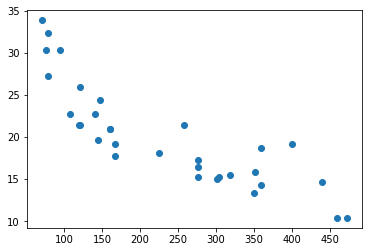

In [9]:
# Solve and Comment Here
plt.scatter(df.disp,df.mpg)
###they have strong relationship, when x is larger y is smaller.

Build your own linear regression as we did in the lecture to calculate the coefficients and intercept that minimizes the lease square error when predicting mpg using disp. What are the values for the coefficients and intercept

-0.09217572308929863 49.996033078294104 123.17918953956399


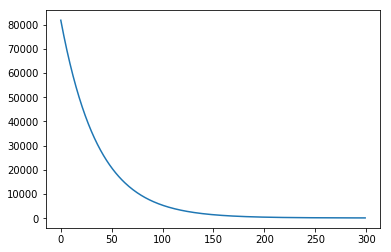

In [13]:
# Solve Here
def predict_mpg (disp,weight,bias):
    pred_mpg = weight*disp + bias
    return pred_mpg
def cost_function(true_label,predicted):
    error = sum((true_label - predicted)**2)/len(true_label)
    return error 
def update_weights(feature,true_label,weight,biase,learning_rate):
    de_dw =  (-2)/len(true_label)*sum((true_label-weight*feature-biase)* feature)
    de_db =  (-2)/len(true_label)*sum(true_label-weight*feature-biase)
    weight = weight -learning_rate * de_dw
    biase = biase -learning_rate * de_db
    return weight,biase
def train(feature,true_label,weight,biase,alpha,iters):
    cost_history = []
    for i in range(iters):
        weight,biase = update_weights(feature,true_label,weight,biase,alpha)
        predictions = predict_mpg(feature,weight,biase)
        cost = cost_function(true_label,predictions)
        cost_history.append(cost)   
    return weight,biase,cost,cost_history
w,b,c,c_h = train(df.disp,df.mpg,1,50,0.0000001,300)
print(w,b,c)
plt.plot(c_h)
##y is cost , x is iteration

Check if you get the same using sklearn linear regression model

In [11]:
# Solve Here
from sklearn.linear_model import LinearRegression
import numpy as np
x = df.disp
y = df.mpg
temp = np.array(x).reshape(-1, 1)
mod = LinearRegression().fit(temp,y)
print('coeffs is ', mod.coef_)
print('bias is ', mod.intercept_)

coeffs is  [-0.04121512]
bias is  29.59985475616395


Make a variable  called my_own_disp that goes between 100 and 500 with a step of 1. Use the variable and the coefficients calculated from the linear regression model to calculate the pred of mpg at each value of my_own_disp. Remember the equation pred=w0+w1*x. Plot the resulted line along with the scatter plot you plotted earlier and see if that is a good fit

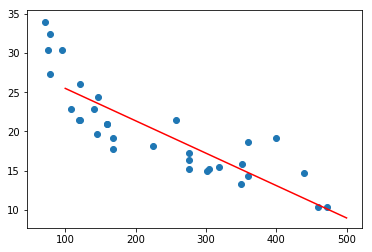

In [12]:
# Solve Here
my_own_disp = np.arange(100,501)
pred = -0.0412 * my_own_disp + 29.5999
# print(my_own_disp)
# print(pred)
plt.plot(my_own_disp,pred,c = "r")
plt.scatter(df.disp,df.mpg)

Do a scatter plot between mpg and each of the features other than the model. Can you visually tell which features are more important in calculating the mpg?

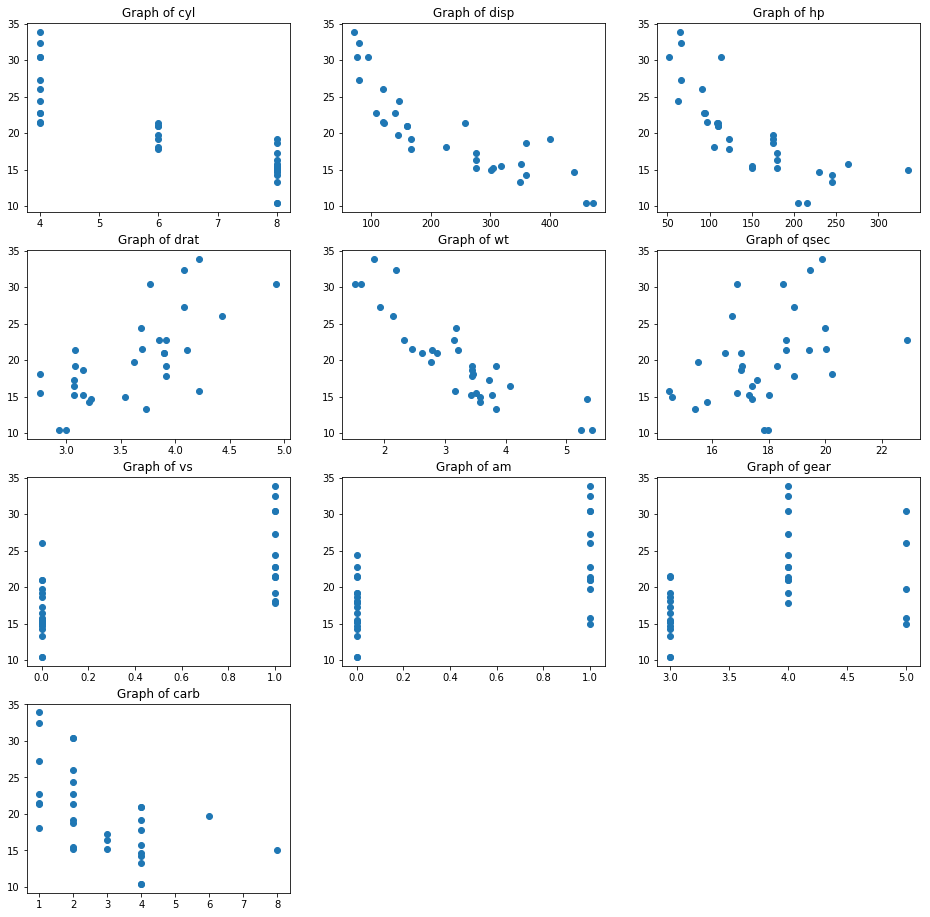

In [13]:
# Solve Here
y = df.mpg
x = df[["cyl","disp","hp","drat","wt","qsec","vs","am","gear","carb"]]
plt.figure(figsize=(16,16))
i=1
for ele in x:
    plt.subplot(4,3,i)
    plt.scatter(x[ele],y)
    i+=1
    plt.title('Graph of ' + ele)
###### disp , hp, drat,wt,qsec are more important to calculate the mpg.

Now, do a linear regression model using sklearn to fit all the features except the model and predict the mpg. What are the coefficients for each feature? Based on the coefficients, can you tell which features are important? Does it match your expectations from what you have visually seen?

In [14]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
import numpy as np

In [15]:
# Solve and Comment Here
####Data Scaling
scaler = StandardScaler().fit(x)
x_scaled=scaler.transform(x)
print(x_scaled.shape)

(32, 10)


In [16]:
####modeling
mod = LinearRegression().fit(x_scaled,y)
print('coeffs are ', mod.coef_)
print('bias is ', mod.intercept_)

coeffs are  [-0.19588953  1.626723   -1.44967936  0.4142235  -3.57801491  1.444047
  0.15763526  1.23776483  0.47595069 -0.31702919]
bias is  20.090625000000006


disp , hp, wt,qsec are important.